In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor,XGBRFRegressor

In [4]:
df=pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
col_attr=df.select_dtypes(include=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
num_attr=df.select_dtypes(include=['int64','Float64'])
num_attr

,ID,Price,Prod. year,Cylinders,Airbags
0,45654403,13328,2010,6.0,12
1,44731507,16621,2011,6.0,8
2,45774419,8467,2006,4.0,2
3,45769185,3607,2011,4.0,0
4,45809263,11726,2014,4.0,4
...,...,...,...,...,...
19232,45798355,8467,1999,4.0,5
19233,45778856,15681,2011,4.0,8
19234,45804997,26108,2010,4.0,4
19235,45793526,5331,2007,4.0,4


In [7]:
col_attr

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,02-Mar,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,04-May,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,04-May,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,04-May,Left wheel,Black


In [8]:
df.duplicated().sum()

np.int64(313)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.count()

ID                  18924
Price               18924
Levy                18924
Manufacturer        18924
Model               18924
Prod. year          18924
Category            18924
Leather interior    18924
Fuel type           18924
Engine volume       18924
Mileage             18924
Cylinders           18924
Gear box type       18924
Drive wheels        18924
Doors               18924
Wheel               18924
Color               18924
Airbags             18924
dtype: int64

In [12]:
df['Levy']=df['Levy'].replace('-',0,regex=False)
df['Levy']=pd.to_numeric(df['Levy'],errors='coerce')
df['Levy']

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18924, dtype: int64

In [13]:
df['Engine volume']=df['Engine volume'].str.replace('Turbo','',regex=False)
df['Engine volume']=pd.to_numeric(df['Engine volume'],errors='coerce')
df['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18924, dtype: float64

In [14]:
df['Mileage']=df['Mileage'].str.replace('km','',regex=False)
df['Mileage']=pd.to_numeric(df['Mileage'],errors='coerce')
df['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 18924, dtype: int64

In [15]:
df['Doors'].value_counts()

Doors
04-May    18032
02-Mar      768
>5          124
Name: count, dtype: int64

In [16]:
df['Doors']=df['Doors'].replace({
    '04-May':4,
    '02-Mar':2,
    '>5':6
},regex=False)
df['Doors'].value_counts()

C:\Users\nichu\AppData\Local\Temp\ipykernel_29640\3859712635.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Doors']=df['Doors'].replace({


Doors
4    18032
2      768
6      124
Name: count, dtype: int64

In [17]:
df['Model'].value_counts()

Model
Prius               1069
Sonata              1067
Camry                929
Elantra              910
E 350                534
                    ... 
Vito Exstralong        1
Versa SE               1
Fusion HYBRID SE       1
C30                    1
Optima k5              1
Name: count, Length: 1590, dtype: int64

analyzing column attributes

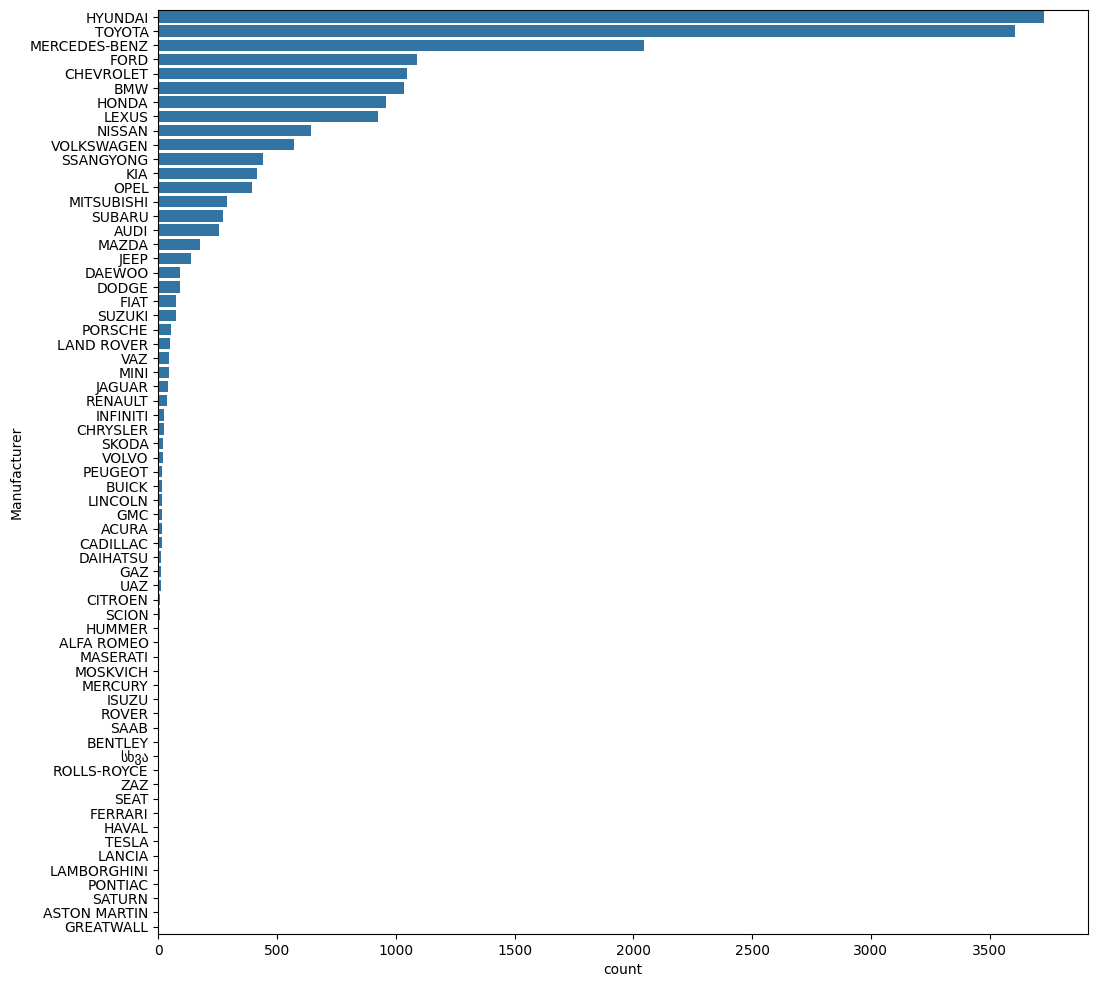

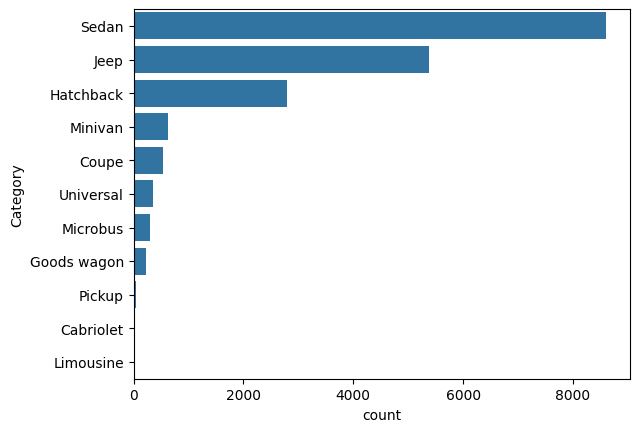

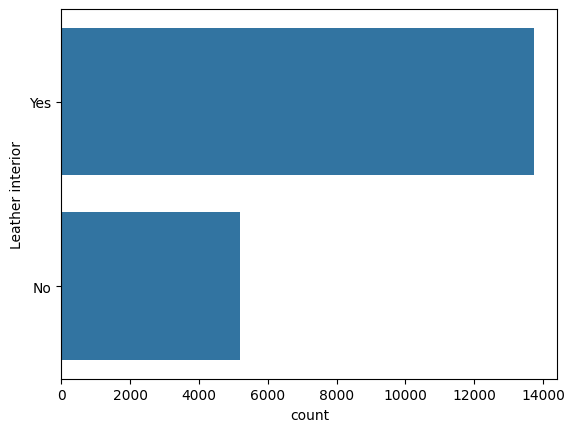

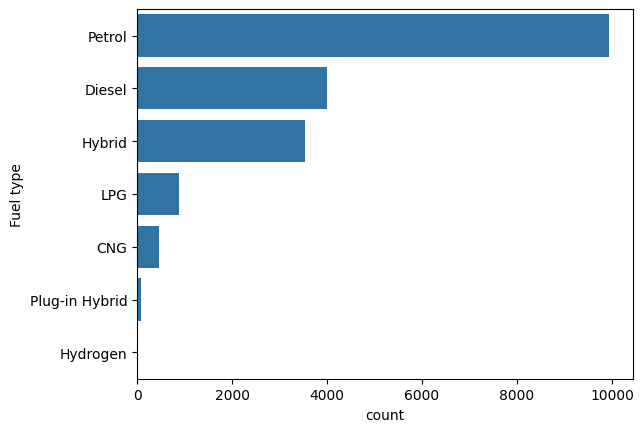

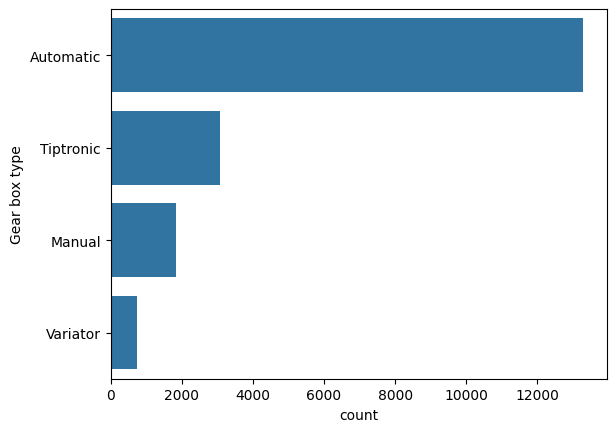

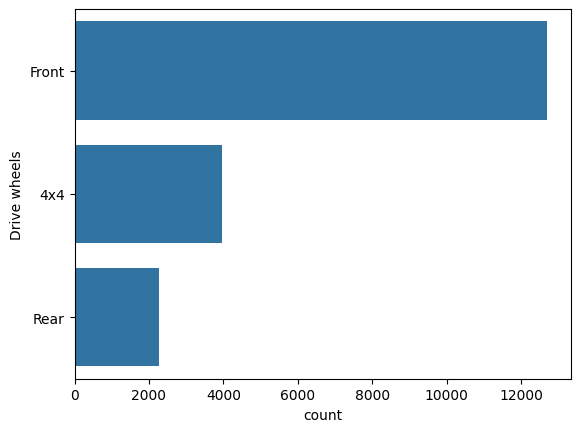

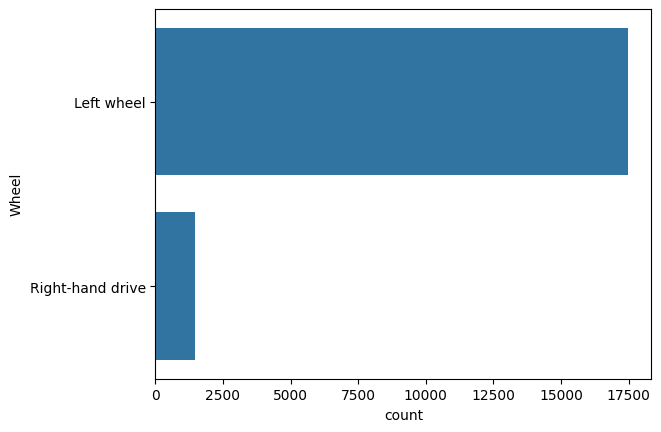

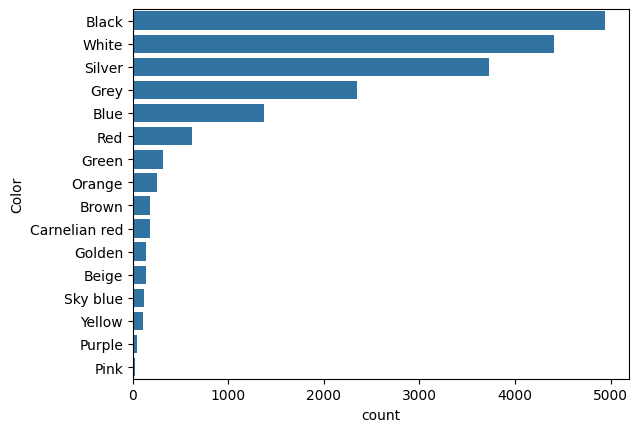

In [88]:
plt.figure(figsize=(12,12))
for cols in col_attr:
    if cols=='Model':
        continue
    sns.countplot(y=cols,data=df,order=df[cols].value_counts().index)
    plt.show()

analyzing cols with very high categories

In [18]:
df['Model'].value_counts()

Model
Prius               1069
Sonata              1067
Camry                929
Elantra              910
E 350                534
                    ... 
Vito Exstralong        1
Versa SE               1
Fusion HYBRID SE       1
C30                    1
Optima k5              1
Name: count, Length: 1590, dtype: int64

The average price for each category in a column

In [110]:
for cols in col_attr:
    model_impact = df.groupby(cols)['Price'].agg(['count', 'mean']).sort_values(by='count', ascending=False)
    print(model_impact)


               count          mean
Manufacturer                      
HYUNDAI         3729  22306.000805
TOYOTA          3606  14302.447865
MERCEDES-BENZ   2043  18590.331375
FORD            1088  15411.850184
CHEVROLET       1047  14894.873926
...              ...           ...
GREATWALL          1  10036.000000
ASTON MARTIN       1  54000.000000
PONTIAC            1   6600.000000
SATURN             1  13799.000000
TESLA              1  53941.000000

[65 rows x 2 columns]
                        count          mean
Model                                      
Prius                    1069  11436.182413
Sonata                   1067  14379.360825
Camry                     929  12604.988159
Elantra                   910  16041.062637
E 350                     534  10004.247191
...                       ...           ...
1500,1600 Schtufenheck      1  12544.000000
147                         1   3700.000000
135                         1   2901.000000
130                         1  13485.0

In [107]:
df.loc[df['Manufacturer']=='ROLLS-ROYCE']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
10265,26556126,157,0,ROLLS-ROYCE,Phantom,1939,Cabriolet,Yes,Petrol,5.0,129000,8.0,Automatic,Rear,4,Left wheel,Silver,0
15613,41720592,200,0,ROLLS-ROYCE,Phantom,1939,Limousine,Yes,Petrol,2.2,169000,4.0,Manual,Rear,4,Left wheel,White,0


In [ ]:
for cols in col_attr:
    sns.countplot(y='Manufacturer',data=df,order=)

In [121]:
corr=df.corr(numeric_only=True)
corr['Price'].sort_values(ascending=False)

Price            1.000000
Prod. year       0.012689
Engine volume    0.008888
Cylinders        0.007435
ID              -0.000797
Mileage         -0.001763
Levy            -0.003558
Airbags         -0.012709
Doors           -0.031198
Name: Price, dtype: float64

In [19]:
import datetime
dnow=datetime.datetime.now()
df['Car_age']=dnow.year-df['Prod. year']
df.drop('Prod. year',axis=1,inplace=True)
df

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car_age
0,45654403,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,15
1,44731507,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,14
2,45774419,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,19
3,45769185,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,14
4,45809263,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,26
19233,45778856,15681,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,14
19234,45804997,26108,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,15
19235,45793526,5331,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4,18


In [20]:
num_attr=df.select_dtypes('int64','Float64')
num_attr

,ID,Price,Levy,Mileage,Doors,Airbags,Car_age
0,45654403,13328,1399,186005,4,12,15
1,44731507,16621,1018,192000,4,8,14
2,45774419,8467,0,200000,4,2,19
3,45769185,3607,862,168966,4,0,14
4,45809263,11726,446,91901,4,4,11
...,...,...,...,...,...,...,...
19232,45798355,8467,0,300000,2,5,26
19233,45778856,15681,831,161600,4,8,14
19234,45804997,26108,836,116365,4,4,15
19235,45793526,5331,1288,51258,4,4,18


In [21]:
df['Price'].sort_values(ascending=False)

16983    26307500
8541       872946
1225       627220
5008       308906
14839      297930
           ...   
10885           3
15347           3
4958            3
7815            1
16992           1
Name: Price, Length: 18924, dtype: int64

In [22]:
outlier=df[df['Price']==26307500].index
df=df.drop(outlier)

In [23]:
df['Price'].sort_values(ascending=False)

8541     872946
1225     627220
5008     308906
14839    297930
9367     297930
          ...  
15347         3
14642         3
8993          3
16992         1
7815          1
Name: Price, Length: 18923, dtype: int64

In [24]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car_age
0,45654403,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,15
1,44731507,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,14
2,45774419,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,19
3,45769185,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,14
4,45809263,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,11


In [25]:
encode_column=['Manufacturer','Model','Category','Leather interior','Fuel type',
               'Gear box type','Drive wheels','Wheel','Color']

In [26]:
df[encode_column]

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...
19232,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,Manual,Rear,Left wheel,Silver
19233,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Grey
19235,CHEVROLET,Captiva,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Black


In [27]:
mean_price_map=df.groupby('Model')['Price'].mean()
df['Model_Target_Encoded']=df['Model'].map(mean_price_map)
df

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car_age,Model_Target_Encoded
0,45654403,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,15,10658.569767
1,44731507,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,14,7508.500000
2,45774419,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,19,11102.885135
3,45769185,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,14,8172.547945
4,45809263,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,11,11102.885135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,26,7564.875000
19233,45778856,15681,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,14,14379.360825
19234,45804997,26108,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,15,30050.122066
19235,45793526,5331,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4,18,17752.692857


In [28]:
encode_column

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color']

In [29]:
mean_price_map=df.groupby('Manufacturer')['Price'].mean()
df['Manufacturer_Target_Encoded']=df['Manufacturer'].map(mean_price_map)
mean_price_map=df.groupby('Color')['Price'].mean()
df['Color_Target_Encoded']=df['Color'].map(mean_price_map)
mean_price_map=df.groupby('Category')['Price'].mean()
df['Category_Target_Encoded']=df['Category'].map(mean_price_map)
mean_price_map=df.groupby('Fuel type')['Price'].mean()
df['Fuel_type_Target_Encoded']=df['Fuel type'].map(mean_price_map)
df

,ID,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,...,Doors,Wheel,Color,Airbags,Car_age,Model_Target_Encoded,Manufacturer_Target_Encoded,Color_Target_Encoded,Category_Target_Encoded,Fuel_type_Target_Encoded
0,45654403,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,...,4,Left wheel,Silver,12,15,10658.569767,20052.594391,15122.033253,23760.507252,10845.476688
1,44731507,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,...,4,Left wheel,Black,8,14,7508.500000,14894.873926,18915.184466,23760.507252,17391.153459
2,45774419,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,...,4,Right-hand drive,Black,2,19,11102.885135,14162.073958,18915.184466,11354.611647,17391.153459
3,45769185,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,...,4,Left wheel,White,0,14,8172.547945,15411.850184,18141.962786,23760.507252,10845.476688
4,45809263,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,...,4,Left wheel,Silver,4,11,11102.885135,14162.073958,15122.033253,11354.611647,17391.153459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000,...,2,Left wheel,Silver,5,26,7564.875000,18590.331375,15122.033253,21282.356061,8186.859275
19233,45778856,15681,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600,...,4,Left wheel,Red,8,14,14379.360825,22306.000805,13645.670418,14202.733837,17391.153459
19234,45804997,26108,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365,...,4,Left wheel,Grey,4,15,30050.122066,22306.000805,19242.446436,23760.507252,24115.589000
19235,45793526,5331,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2.0,51258,...,4,Left wheel,Black,4,18,17752.692857,14894.873926,18915.184466,23760.507252,24115.589000


In [30]:
temp_drop=['Model','Manufacturer','Color','Category','Fuel type']
df=df.drop(temp_drop,axis=1)
df

,ID,Price,Levy,Leather interior,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags,Car_age,Model_Target_Encoded,Manufacturer_Target_Encoded,Color_Target_Encoded,Category_Target_Encoded,Fuel_type_Target_Encoded
0,45654403,13328,1399,Yes,3.5,186005,6.0,Automatic,4x4,4,Left wheel,12,15,10658.569767,20052.594391,15122.033253,23760.507252,10845.476688
1,44731507,16621,1018,No,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,8,14,7508.500000,14894.873926,18915.184466,23760.507252,17391.153459
2,45774419,8467,0,No,1.3,200000,4.0,Variator,Front,4,Right-hand drive,2,19,11102.885135,14162.073958,18915.184466,11354.611647,17391.153459
3,45769185,3607,862,Yes,2.5,168966,4.0,Automatic,4x4,4,Left wheel,0,14,8172.547945,15411.850184,18141.962786,23760.507252,10845.476688
4,45809263,11726,446,Yes,1.3,91901,4.0,Automatic,Front,4,Left wheel,4,11,11102.885135,14162.073958,15122.033253,11354.611647,17391.153459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,Yes,2.0,300000,4.0,Manual,Rear,2,Left wheel,5,26,7564.875000,18590.331375,15122.033253,21282.356061,8186.859275
19233,45778856,15681,831,Yes,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,8,14,14379.360825,22306.000805,13645.670418,14202.733837,17391.153459
19234,45804997,26108,836,Yes,2.0,116365,4.0,Automatic,Front,4,Left wheel,4,15,30050.122066,22306.000805,19242.446436,23760.507252,24115.589000
19235,45793526,5331,1288,Yes,2.0,51258,4.0,Automatic,Front,4,Left wheel,4,18,17752.692857,14894.873926,18915.184466,23760.507252,24115.589000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18923 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18923 non-null  int64  
 1   Price                        18923 non-null  int64  
 2   Levy                         18923 non-null  int64  
 3   Leather interior             18923 non-null  object 
 4   Engine volume                18923 non-null  float64
 5   Mileage                      18923 non-null  int64  
 6   Cylinders                    18923 non-null  float64
 7   Gear box type                18923 non-null  object 
 8   Drive wheels                 18923 non-null  object 
 9   Doors                        18923 non-null  int64  
 10  Wheel                        18923 non-null  object 
 11  Airbags                      18923 non-null  int64  
 12  Car_age                      18923 non-null  int64  
 13  Model_Target_Encoded 

In [32]:
cat_encode_column=['Leather interior','Gear box type','Drive wheels','Wheel']
cat_encoder=OneHotEncoder(drop='first',sparse_output=False)
#encoded_df=
#encoded_df
encoded_df=df[cat_encode_column]
encoded_df=cat_encoder.fit_transform(encoded_df)
encoded_df=pd.DataFrame(encoded_df,columns=cat_encoder.get_feature_names_out())
encoded_df

,Leather interior_Yes,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
18918,1.0,1.0,0.0,0.0,0.0,1.0,0.0
18919,1.0,0.0,1.0,0.0,1.0,0.0,0.0
18920,1.0,0.0,0.0,0.0,1.0,0.0,0.0
18921,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
df=df.drop(cat_encode_column,axis=1)
df

,ID,Price,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags,Car_age,Model_Target_Encoded,Manufacturer_Target_Encoded,Color_Target_Encoded,Category_Target_Encoded,Fuel_type_Target_Encoded
0,45654403,13328,1399,3.5,186005,6.0,4,12,15,10658.569767,20052.594391,15122.033253,23760.507252,10845.476688
1,44731507,16621,1018,3.0,192000,6.0,4,8,14,7508.500000,14894.873926,18915.184466,23760.507252,17391.153459
2,45774419,8467,0,1.3,200000,4.0,4,2,19,11102.885135,14162.073958,18915.184466,11354.611647,17391.153459
3,45769185,3607,862,2.5,168966,4.0,4,0,14,8172.547945,15411.850184,18141.962786,23760.507252,10845.476688
4,45809263,11726,446,1.3,91901,4.0,4,4,11,11102.885135,14162.073958,15122.033253,11354.611647,17391.153459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,2.0,300000,4.0,2,5,26,7564.875000,18590.331375,15122.033253,21282.356061,8186.859275
19233,45778856,15681,831,2.4,161600,4.0,4,8,14,14379.360825,22306.000805,13645.670418,14202.733837,17391.153459
19234,45804997,26108,836,2.0,116365,4.0,4,4,15,30050.122066,22306.000805,19242.446436,23760.507252,24115.589000
19235,45793526,5331,1288,2.0,51258,4.0,4,4,18,17752.692857,14894.873926,18915.184466,23760.507252,24115.589000


In [34]:
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

In [36]:
col_attr = [
    'Leather interior_Yes',
    'Gear box type_Manual',
    'Gear box type_Tiptronic',
    'Gear box type_Variator',
    'Drive wheels_Front',
    'Drive wheels_Rear',
    'Wheel_Right-hand drive'
]
#df=df.drop(col_attr,axis=1)
df

,ID,Price,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags,Car_age,Model_Target_Encoded,Manufacturer_Target_Encoded,Color_Target_Encoded,Category_Target_Encoded,Fuel_type_Target_Encoded
0,45654403,13328,1399,3.5,186005,6.0,4,12,15,10658.569767,20052.594391,15122.033253,23760.507252,10845.476688
1,44731507,16621,1018,3.0,192000,6.0,4,8,14,7508.500000,14894.873926,18915.184466,23760.507252,17391.153459
2,45774419,8467,0,1.3,200000,4.0,4,2,19,11102.885135,14162.073958,18915.184466,11354.611647,17391.153459
3,45769185,3607,862,2.5,168966,4.0,4,0,14,8172.547945,15411.850184,18141.962786,23760.507252,10845.476688
4,45809263,11726,446,1.3,91901,4.0,4,4,11,11102.885135,14162.073958,15122.033253,11354.611647,17391.153459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18918,45798355,8467,0,2.0,300000,4.0,2,5,26,7564.875000,18590.331375,15122.033253,21282.356061,8186.859275
18919,45778856,15681,831,2.4,161600,4.0,4,8,14,14379.360825,22306.000805,13645.670418,14202.733837,17391.153459
18920,45804997,26108,836,2.0,116365,4.0,4,4,15,30050.122066,22306.000805,19242.446436,23760.507252,24115.589000
18921,45793526,5331,1288,2.0,51258,4.0,4,4,18,17752.692857,14894.873926,18915.184466,23760.507252,24115.589000


In [225]:
encoded_df

,Leather interior_Yes,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
18918,1.0,1.0,0.0,0.0,0.0,1.0,0.0
18919,1.0,0.0,1.0,0.0,1.0,0.0,0.0
18920,1.0,0.0,0.0,0.0,1.0,0.0,0.0
18921,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
prepared_df=pd.concat([df,encoded_df],axis=1)

In [38]:
prepared_df

,ID,Price,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags,Car_age,Model_Target_Encoded,...,Color_Target_Encoded,Category_Target_Encoded,Fuel_type_Target_Encoded,Leather interior_Yes,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive
0,45654403,13328,1399,3.5,186005,6.0,4,12,15,10658.569767,...,15122.033253,23760.507252,10845.476688,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44731507,16621,1018,3.0,192000,6.0,4,8,14,7508.500000,...,18915.184466,23760.507252,17391.153459,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,45774419,8467,0,1.3,200000,4.0,4,2,19,11102.885135,...,18915.184466,11354.611647,17391.153459,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,45769185,3607,862,2.5,168966,4.0,4,0,14,8172.547945,...,18141.962786,23760.507252,10845.476688,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45809263,11726,446,1.3,91901,4.0,4,4,11,11102.885135,...,15122.033253,11354.611647,17391.153459,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18918,45798355,8467,0,2.0,300000,4.0,2,5,26,7564.875000,...,15122.033253,21282.356061,8186.859275,1.0,1.0,0.0,0.0,0.0,1.0,0.0
18919,45778856,15681,831,2.4,161600,4.0,4,8,14,14379.360825,...,13645.670418,14202.733837,17391.153459,1.0,0.0,1.0,0.0,1.0,0.0,0.0
18920,45804997,26108,836,2.0,116365,4.0,4,4,15,30050.122066,...,19242.446436,23760.507252,24115.589000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
18921,45793526,5331,1288,2.0,51258,4.0,4,4,18,17752.692857,...,18915.184466,23760.507252,24115.589000,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
labels=prepared_df[['Price']]
labels

,Price
0,13328
1,16621
2,8467
3,3607
4,11726
...,...
18918,8467
18919,15681
18920,26108
18921,5331


In [40]:
dropper=['Price']
prepared_df=prepared_df.drop(dropper,axis=1)
prepared_df

,ID,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags,Car_age,Model_Target_Encoded,Manufacturer_Target_Encoded,Color_Target_Encoded,Category_Target_Encoded,Fuel_type_Target_Encoded,Leather interior_Yes,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive
0,45654403,1399,3.5,186005,6.0,4,12,15,10658.569767,20052.594391,15122.033253,23760.507252,10845.476688,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44731507,1018,3.0,192000,6.0,4,8,14,7508.500000,14894.873926,18915.184466,23760.507252,17391.153459,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,45774419,0,1.3,200000,4.0,4,2,19,11102.885135,14162.073958,18915.184466,11354.611647,17391.153459,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,45769185,862,2.5,168966,4.0,4,0,14,8172.547945,15411.850184,18141.962786,23760.507252,10845.476688,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45809263,446,1.3,91901,4.0,4,4,11,11102.885135,14162.073958,15122.033253,11354.611647,17391.153459,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18918,45798355,0,2.0,300000,4.0,2,5,26,7564.875000,18590.331375,15122.033253,21282.356061,8186.859275,1.0,1.0,0.0,0.0,0.0,1.0,0.0
18919,45778856,831,2.4,161600,4.0,4,8,14,14379.360825,22306.000805,13645.670418,14202.733837,17391.153459,1.0,0.0,1.0,0.0,1.0,0.0,0.0
18920,45804997,836,2.0,116365,4.0,4,4,15,30050.122066,22306.000805,19242.446436,23760.507252,24115.589000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
18921,45793526,1288,2.0,51258,4.0,4,4,18,17752.692857,14894.873926,18915.184466,23760.507252,24115.589000,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(prepared_df,labels,random_state=42,test_size=0.2)

In [42]:
y_test

,Price
3485,11604
9138,470
1807,20162
9527,7527
8437,18817
...,...
14898,27654
1683,2509
11813,110
18698,16308


In [43]:
lin_reg=LinearRegression()
lin_rmse=-cross_val_score(lin_reg,X_train,y_train,scoring='neg_root_mean_squared_error',cv=10)
pd.Series(lin_rmse).describe()

count       10.000000
mean     12638.727705
std        888.303064
min      11410.146044
25%      11971.588031
50%      12670.403419
75%      13194.603972
max      14201.991237
dtype: float64

In [44]:
tree_reg=DecisionTreeRegressor()
tree_rmse=-cross_val_score(tree_reg,X_train,y_train,scoring='neg_root_mean_squared_error',cv=10)
pd.Series(tree_rmse).describe()

count       10.000000
mean     10640.081528
std       1154.613453
min       9187.434516
25%       9661.906951
50%      10480.597916
75%      11641.928752
max      12403.109367
dtype: float64

In [ ]:
ran_reg=RandomForestRegressor()
ran_rmse=-cross_val_score(ran_reg,X_train,y_train,scoring='neg_root_mean_squared_error',cv=10)
pd.Series(ran_rmse).describe()

c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

count       10.000000
mean      8361.701672
std       2407.515584
min       6209.474257
25%       6818.763587
50%       7697.139074
75%       9178.235255
max      14241.673238
dtype: float64

In [46]:
gra_reg=GradientBoostingRegressor()
gra_rmse=-cross_val_score(gra_reg,X_train,y_train,scoring='neg_root_mean_squared_error',cv=10)
pd.Series(gra_rmse).describe()

c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\ensemble\_gb.py:672

count       10.000000
mean     10971.587977
std       2457.673935
min       8913.593870
25%       9686.200955
50%      10330.316371
75%      11343.961970
max      17467.200629
dtype: float64

In [47]:
x_reg=XGBRegressor()
X_rmse=-cross_val_score(x_reg,X_train,y_train,scoring='neg_root_mean_squared_error',cv=10)
pd.Series(X_rmse).describe()

count       10.000000
mean      9349.776221
std       2537.436616
min       6630.016113
25%       7679.315186
50%       8712.202637
75%      10152.718262
max      14996.927734
dtype: float64

In [49]:
x_reg=XGBRFRegressor()
X_rmse=-cross_val_score(x_reg,X_train,y_train,scoring='neg_root_mean_squared_error',cv=10)
pd.Series(X_rmse).describe()

count       10.000000
mean     12889.185938
std       2576.067266
min       9818.526367
25%      11320.023926
50%      12391.288086
75%      14117.431641
max      17763.781250
dtype: float64